# Visualizing Earnings Based On College Majors

In this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

We'll explore how to do these and more while primarily working in `pandas`.

## Exploring the Dataset

In [1]:
# Setting up the environment
import pandas as pd
import matplotlib.pyplot as plt
# Display plots inline
%matplotlib inline

In [2]:
# Read the dataset
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0, :]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Drop Rows with Missing Values 

`Matplotlib` expects that columns of values we pass in have matching lengths, and missing values will cause matplotlib to throw errors.

In [6]:
# Number of rows in recent_grads
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [7]:
# Drop rows containing missing values
recent_grads = recent_grads.dropna()

In [8]:
# Number of rows after dropping missing values
clean_data_count = recent_grads.shape[0]
clean_data_count

172

Only one row contained missing values and was dropped.

## Pandas, Scatter Plots

In [48]:
plt.style.available

['classic',
 'seaborn-pastel',
 'seaborn-bright',
 'seaborn-ticks',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-muted',
 'bmh',
 'seaborn-notebook',
 'seaborn-poster',
 'grayscale',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-deep',
 'fivethirtyeight',
 'dark_background',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-dark-palette',
 'seaborn-paper']

In [50]:
# Change Plot Style
plt.style.use('fivethirtyeight')

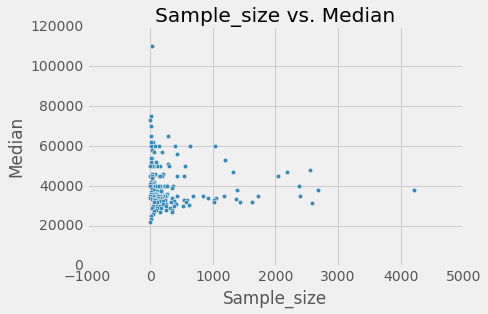

In [51]:
# Sample_size vs. Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample_size vs. Median')

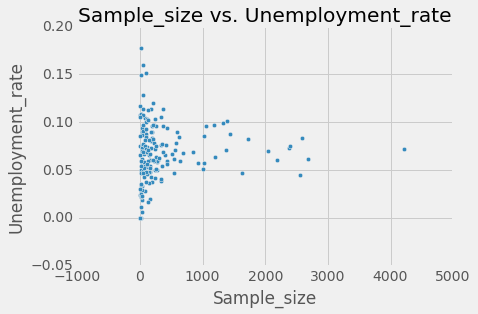

In [52]:
# Sample_size vs. Unemployment_rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size vs. Unemployment_rate')

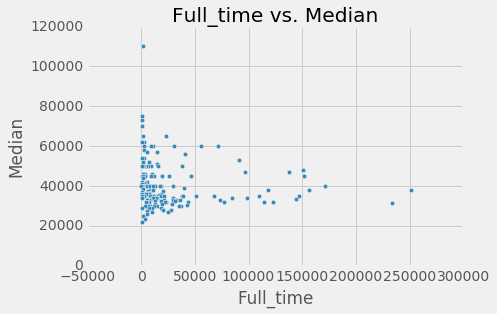

In [53]:
# Full_time vs. Median
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs. Median')

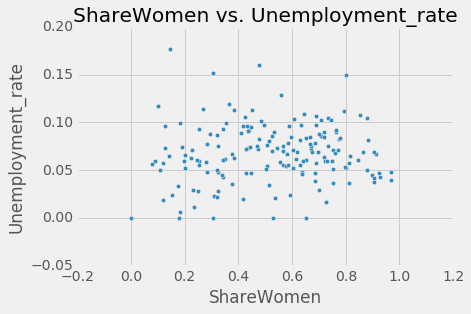

In [54]:
# ShareWomen vs. Unemployment_rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment_rate')

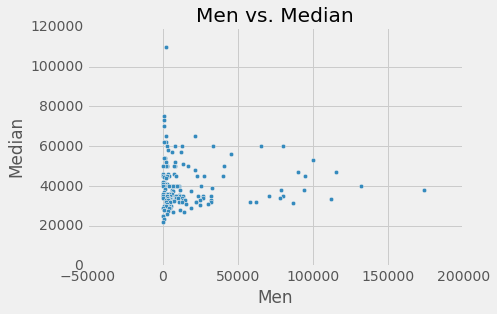

In [55]:
# Men vs. Median
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median')

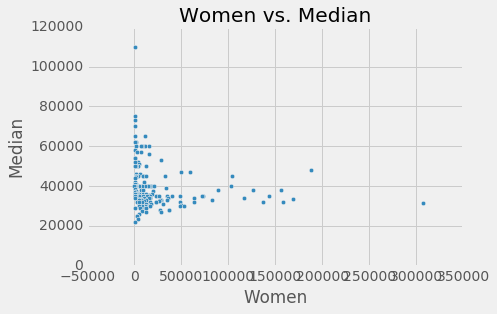

In [56]:
# Women vs. Median
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median')

The previous plots show the following:

- Students in more popular majors make less money than the ones in non-popular majors, because as the number of students in a major increased their median salary decreased.
- Students that majored in subjects that were majority female do not necessarily make more money, and the same for men. Hence, it appears there is no relation between gender and salary.
- As the number of full-time employees in a major increased their median salary decreased, and majors with the lowest number of full-time employees had the highest median salaries.

## Pandas, Histograms

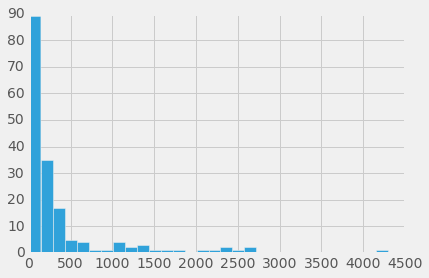

In [57]:
# Sample_size Frequencey Distribution
recent_grads['Sample_size'].hist(bins=30, range=(0, 4300))

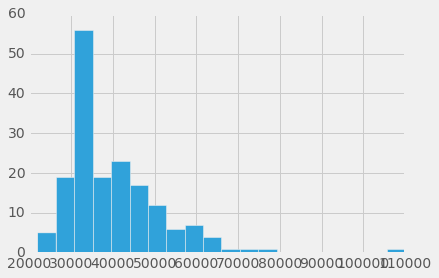

In [58]:
# Median Frequencey Distribution
recent_grads['Median'].hist(bins=20, range=(22000, 110000))

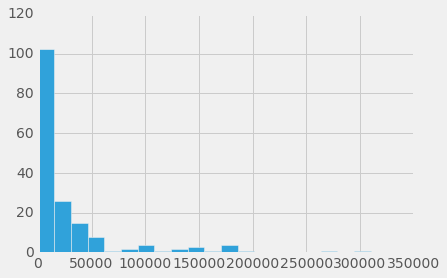

In [59]:
# Employed Frequencey Distribution
recent_grads['Employed'].hist(bins=20, range=(0, 310000))

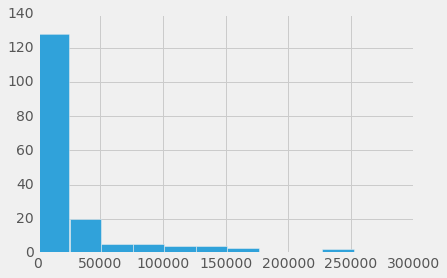

In [60]:
# Full_time Frequencey Distribution
recent_grads['Full_time'].hist(bins=10, range=(112, 252000))

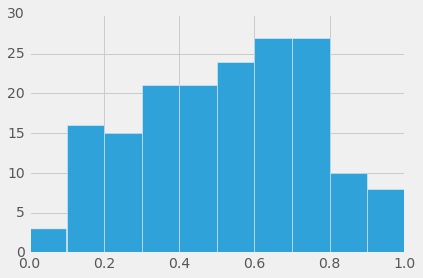

In [61]:
# ShareWomen Frequencey Distribution
recent_grads['ShareWomen'].hist(bins=10, range=(0, 1))

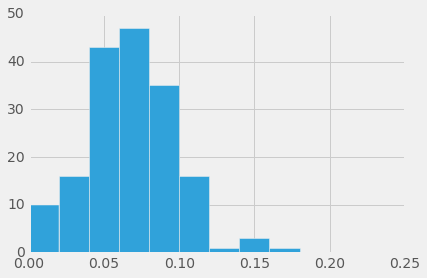

In [62]:
# Unemployment_rate Frequencey Distribution
recent_grads['Unemployment_rate'].hist(bins=10, range=(0, 0.2))

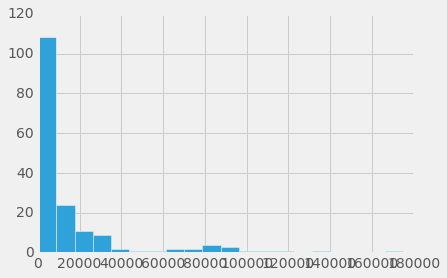

In [63]:
# Men Frequencey Distribution
recent_grads['Men'].hist(bins=20, range=(110, 175000))

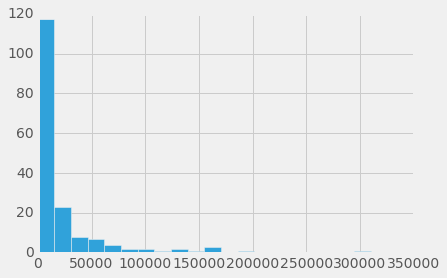

In [64]:
# Women Frequencey Distribution
recent_grads['Women'].hist(bins=20, range=(0, 310000))

The previous histograms show the following:

- The most common median salaries range from 31 to 35K.

# Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6023e19630>,
      dtype=object)

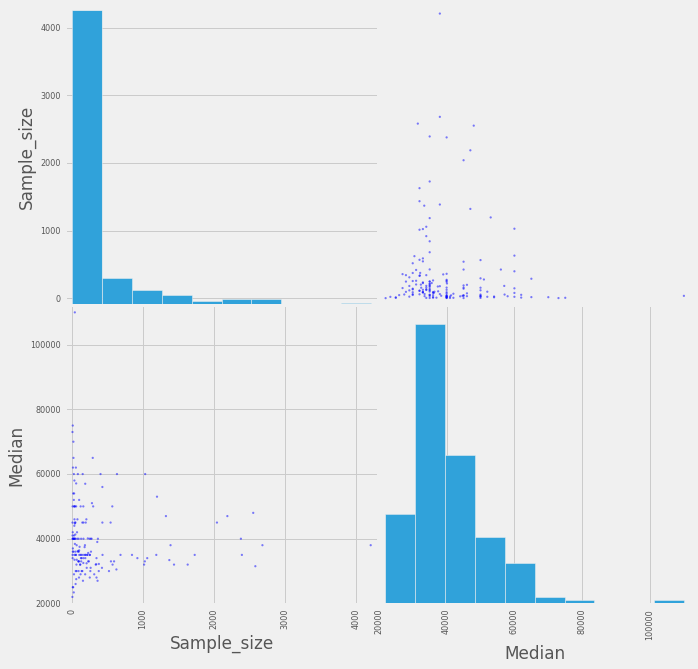

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6023c91a90>,
      dtype=object)

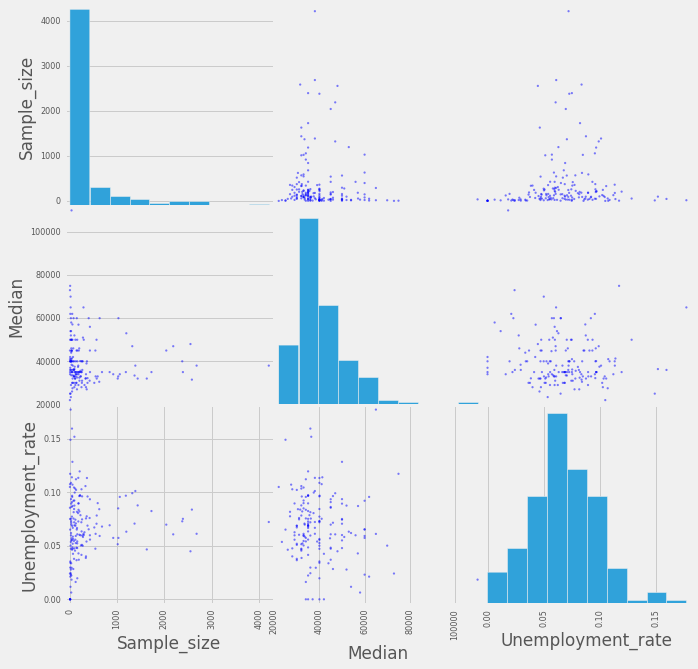

In [66]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Pandas, Bar Plots

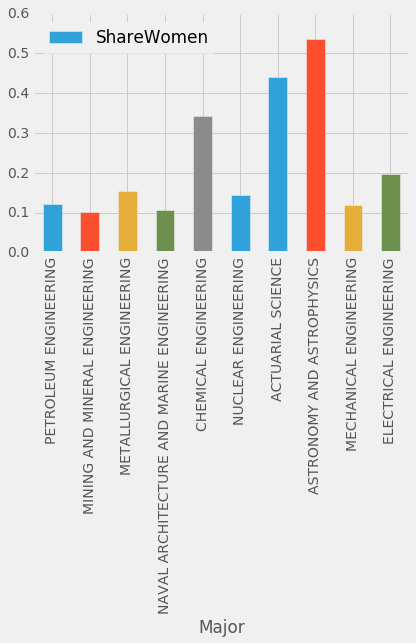

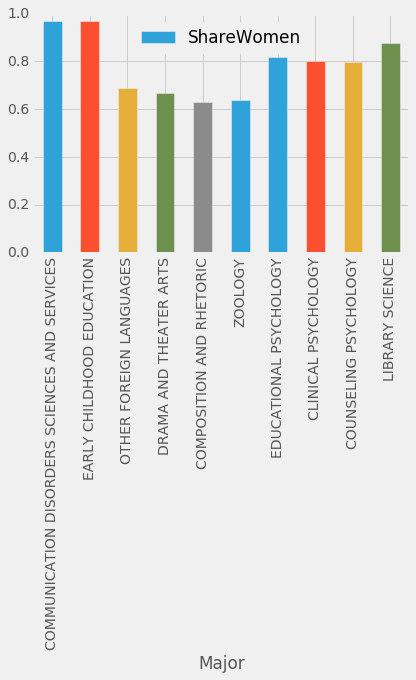

In [67]:
# Compare the percentages of women (ShareWomen) from the first ten rows 
# and last ten rows of the recent_grads dataframe
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

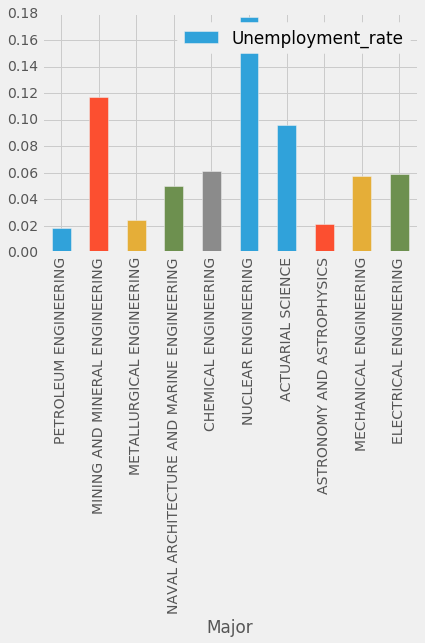

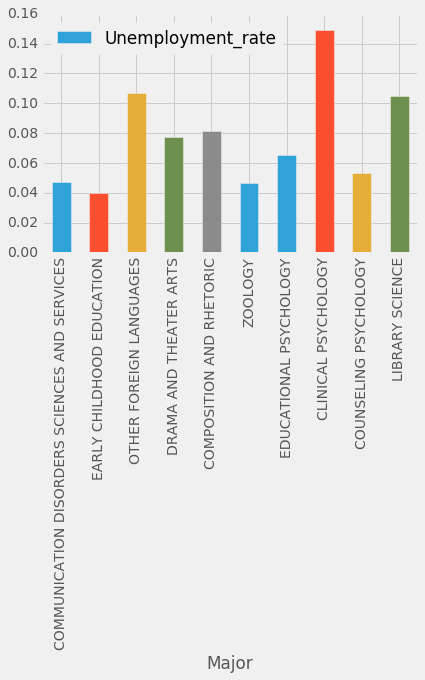

In [68]:
# Compare the unemployment rate (Unemployment_rate) from the first ten rows 
# and last ten rows of the recent_grads dataframe
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')